# Project 04: 2018 FIFA World Cup Statistical Analysis

## Introduction
1. Data source: https://www.kaggle.com/mathan/fifa-2018-match-statistics
2. Data description
    1. I thought of consolidating and sharing this public data to see how the data science world uses it discover interesting patterns. The data has been collected from 2018 FIFA World Cup Russia Official App.
    2. On the column '1st Goal', any goal that was scored in the extra time will be denoted as 45 or 90 based on 1st or 2nd half of the game (ex. if 1st goal was scored in 45+2 mins then it will be mentioned as 45 instead of 47, likewise for the 2nd half)
3. Objectives
    1. Perform regression analysis to examine the relationship between variables to answer the questions below:
        1. "what are the indicators that raise the probability of scoring a goal?"
        2. "Does a team with the better defence tend to win a match?"
        3. "What are the factors that could determine the victory of a match?
    2. Take a step-by-step procedure to practice Python coding regarding statistical analysis.

<a id='Top of Contents'></a>
## 1. Exploratory Data Analysis (EDA)
### (1) Data cleaning & Missing value treatment

In [1]:
# Import libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

import plotly.express as px
import plotly.graph_objects as go

import rfpimp
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

import statsmodels.formula.api as smf
from scipy import stats

C:\Users\james\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Define working directory
os.chdir("C:/Users/james/Desktop/Coding/Kaggle/FIFA 2018")

# Import csv file
df = pd.read_csv("FIFA 2018.csv")

# Print first six rows
df.head(6)

Date          Team      Opponent  Goal Scored  Ball Possession %  \
0  14-06-2018        Russia  Saudi Arabia            5                 40   
1  14-06-2018  Saudi Arabia        Russia            0                 60   
2  15-06-2018         Egypt       Uruguay            0                 43   
3  15-06-2018       Uruguay         Egypt            1                 57   
4  15-06-2018       Morocco          Iran            0                 64   
5  15-06-2018          Iran       Morocco            1                 36   

   Attempts  On-Target  Off-Target  Blocked  Corners  ...  Yellow Card  \
0        13          7           3        3        6  ...            0   
1         6          0           3        3        2  ...            0   
2         8          3           3        2        0  ...            2   
3        14          4           6        4        5  ...            0   
4        13          3           6        4        5  ...            1   
5         8          2           5        1        2  ...            3   

   Yellow & Red  Red  Man of the Match  1st Goal        Round  PSO  \
0             0    0               Yes      12.0  Group Stage   No   
1             0    0                No       NaN  Group Stage   No   
2             0    0                No       NaN  Group Stage   No   
3             0    0               Yes      89.0  Group Stage   No   
4             0    0                No       NaN  Group Stage   No   
5             0    0               Yes      90.0  Group Stage   No   

   Goals in PSO  Own goals  Own goal Time  
0             0        NaN            NaN  
1             0        NaN            NaN  
2             0        NaN            NaN  
3             0        NaN            NaN  
4             0        1.0           90.0  
5             0        NaN            NaN  

[6 rows x 27 columns]

In [3]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    128 non-null    object 
 1   Team                    128 non-null    object 
 2   Opponent                128 non-null    object 
 3   Goal Scored             128 non-null    int64  
 4   Ball Possession %       128 non-null    int64  
 5   Attempts                128 non-null    int64  
 6   On-Target               128 non-null    int64  
 7   Off-Target              128 non-null    int64  
 8   Blocked                 128 non-null    int64  
 9   Corners                 128 non-null    int64  
 10  Offsides                128 non-null    int64  
 11  Free Kicks              128 non-null    int64  
 12  Saves                   128 non-null    int64  
 13  Pass Accuracy %         128 non-null    int64  
 14  Passes                  128 non-null    in

In [4]:
# summary statistics
df.describe()

Goal Scored  Ball Possession %    Attempts   On-Target  Off-Target  \
count   128.000000         128.000000  128.000000  128.000000  128.000000   
mean      1.320312          49.992188   12.593750    3.914062    5.273438   
std       1.156519          10.444074    5.245827    2.234403    2.409675   
min       0.000000          25.000000    3.000000    0.000000    1.000000   
25%       0.000000          42.000000    9.000000    2.000000    4.000000   
50%       1.000000          50.000000   12.000000    3.500000    5.000000   
75%       2.000000          58.000000   15.000000    5.000000    7.000000   
max       6.000000          75.000000   26.000000   12.000000   11.000000   

          Blocked     Corners    Offsides  Free Kicks       Saves  ...  \
count  128.000000  128.000000  128.000000  128.000000  128.000000  ...   
mean     3.359375    4.718750    1.343750   14.890625    2.726562  ...   
std      2.403195    2.446072    1.193404    4.724262    2.049447  ...   
min      0.000000    0.000000    0.000000    5.000000    0.000000  ...   
25%      1.750000    3.000000    0.000000   11.000000    1.000000  ...   
50%      3.000000    5.000000    1.000000   15.000000    2.000000  ...   
75%      4.000000    6.000000    2.000000   18.000000    4.000000  ...   
max     10.000000   11.000000    5.000000   26.000000    9.000000  ...   

            Passes  Distance Covered (Kms)  Fouls Committed  Yellow Card  \
count   128.000000              128.000000       128.000000   128.000000   
mean    462.648438              106.664062        13.546875     1.695312   
std     151.186311               11.749537         4.619131     1.325454   
min     189.000000               80.000000         5.000000     0.000000   
25%     351.000000              101.000000        10.000000     1.000000   
50%     462.000000              104.500000        13.000000     2.000000   
75%     555.250000              109.000000        16.000000     2.000000   
max    1137.000000              148.000000        25.000000     6.000000   

       Yellow & Red         Red   1st Goal  Goals in PSO  Own goals  \
count    128.000000  128.000000  94.000000    128.000000       12.0   
mean       0.015625    0.015625  39.457447      0.203125        1.0   
std        0.124507    0.124507  24.496506      0.807049        0.0   
min        0.000000    0.000000   1.000000      0.000000        1.0   
25%        0.000000    0.000000  18.250000      0.000000        1.0   
50%        0.000000    0.000000  39.000000      0.000000        1.0   
75%        0.000000    0.000000  54.750000      0.000000        1.0   
max        1.000000    1.000000  90.000000      4.000000        1.0   

       Own goal Time  
count      12.000000  
mean       45.833333  
std        29.978275  
min        12.000000  
25%        21.750000  
50%        35.000000  
75%        75.750000  
max        90.000000  

[8 rows x 21 columns]

In [5]:
# Check missing vales
df.isnull().sum()

Date                        0
Team                        0
Opponent                    0
Goal Scored                 0
Ball Possession %           0
Attempts                    0
On-Target                   0
Off-Target                  0
Blocked                     0
Corners                     0
Offsides                    0
Free Kicks                  0
Saves                       0
Pass Accuracy %             0
Passes                      0
Distance Covered (Kms)      0
Fouls Committed             0
Yellow Card                 0
Yellow & Red                0
Red                         0
Man of the Match            0
1st Goal                   34
Round                       0
PSO                         0
Goals in PSO                0
Own goals                 116
Own goal Time             116
dtype: int64

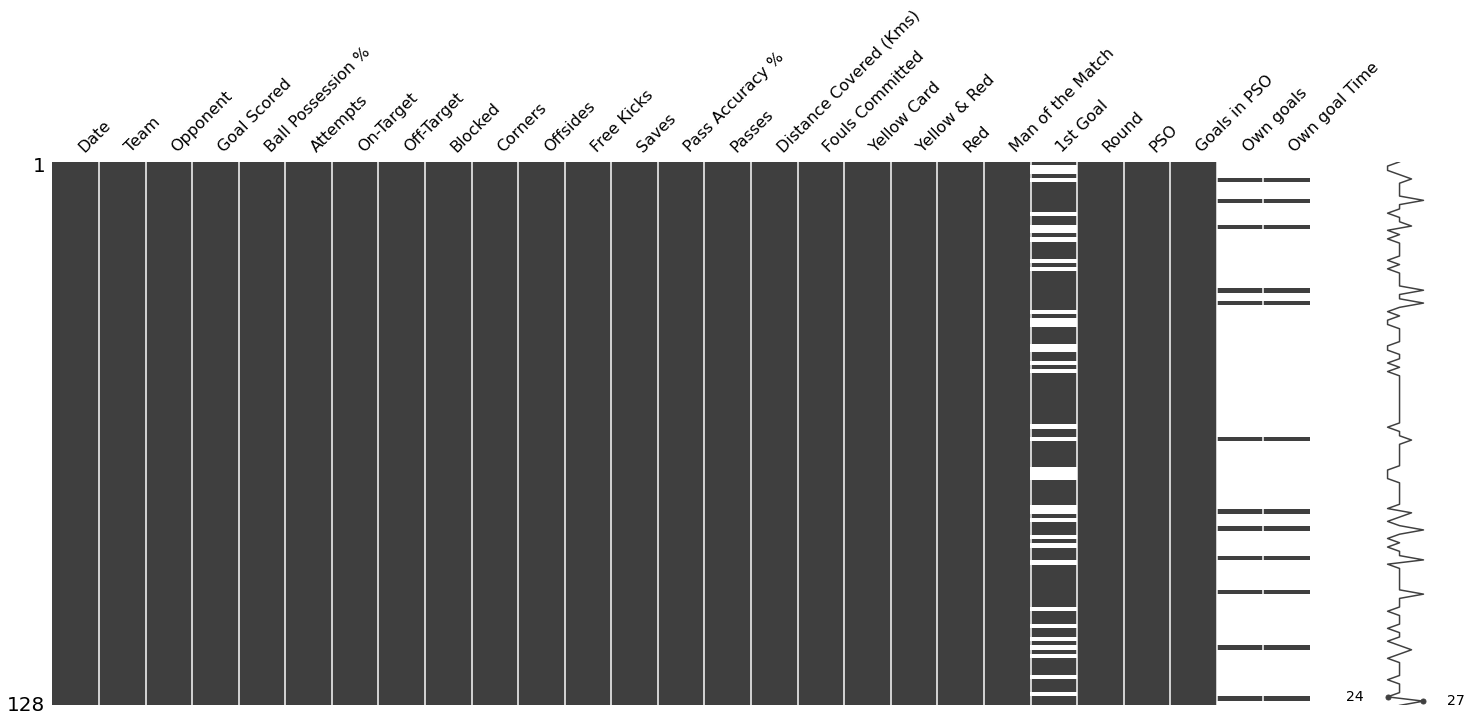

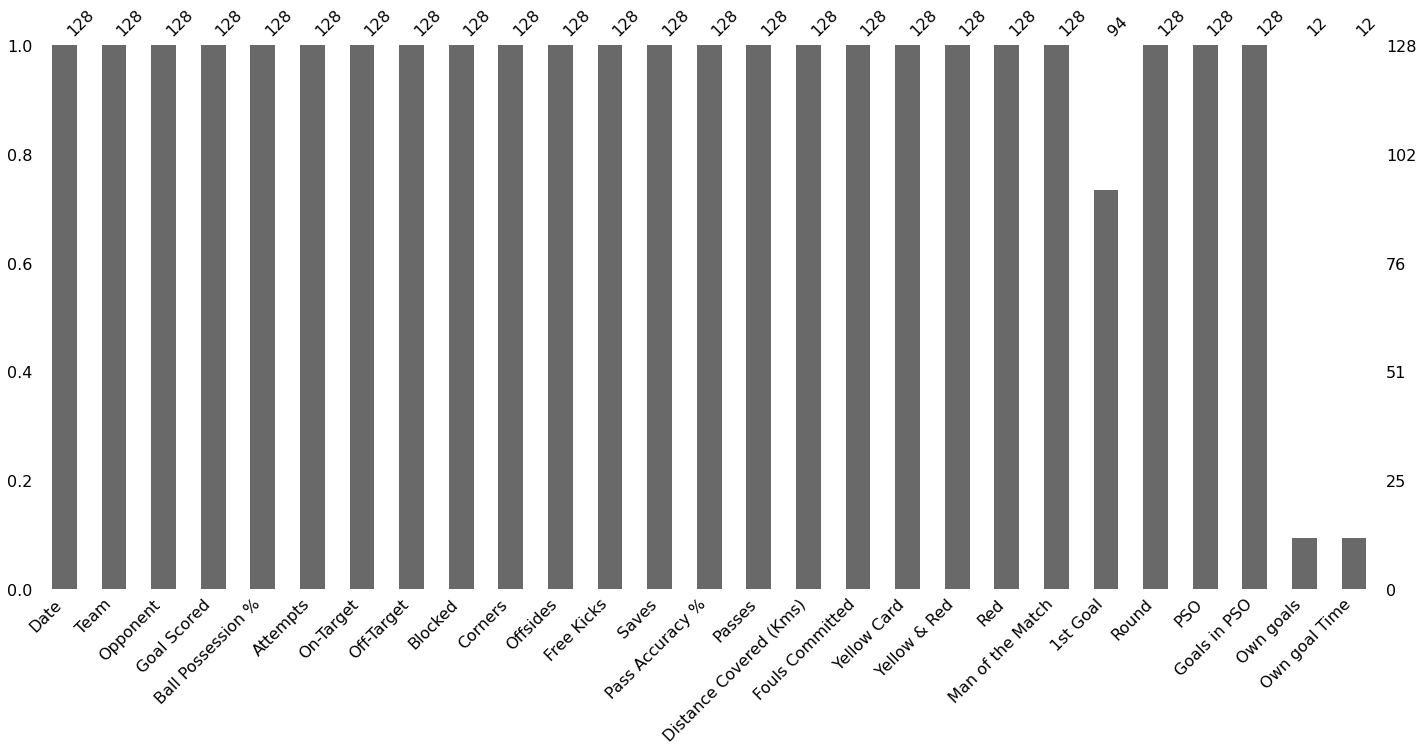

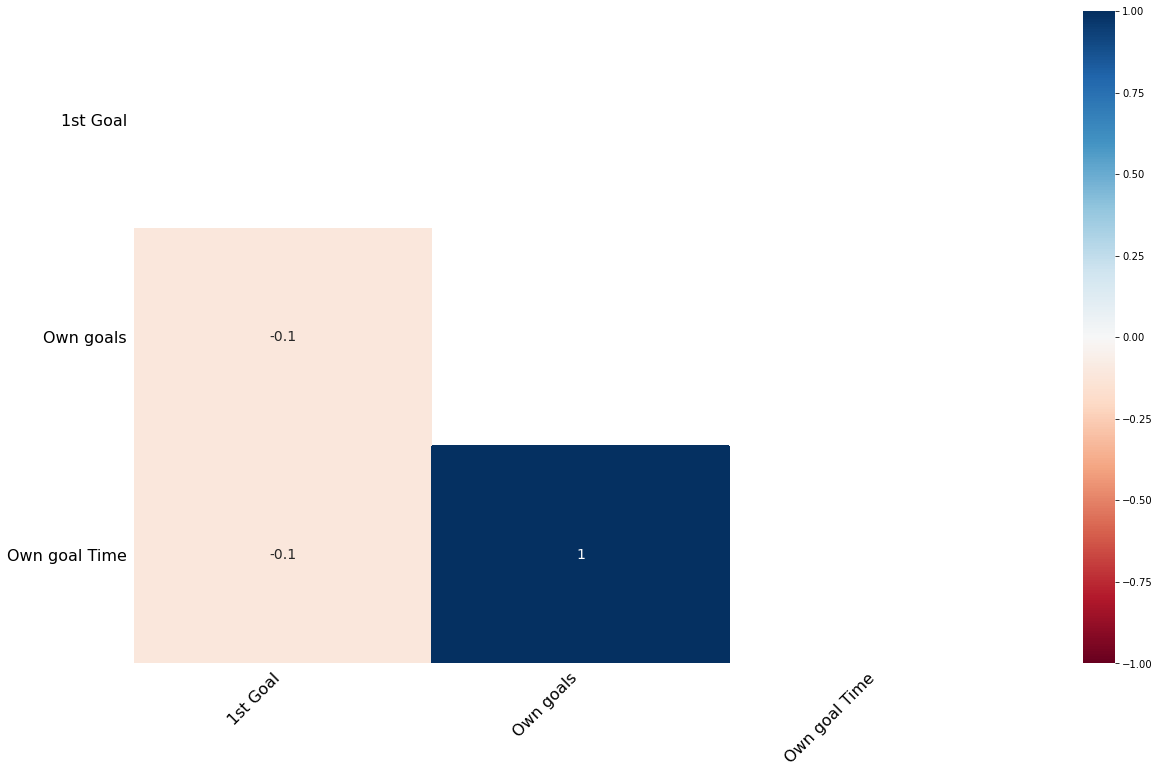

In [6]:
# Missing value visualization 
msno.matrix(df)
plt.show()

msno.bar(df)
plt.show()

msno.heatmap(df)
plt.show()

#### Observations

1. It appears that all missing values in Own goals and Own goal Time are Missing not at Random (MNAR), meaning there is relationship between missingness and its value, mission or non-missing. However, missing vales in 1st Goal are not related to these two variables.
2. According to the heatmap, a value near 1 means if one variable appears then the other variable is very likely to be present, meaning that if one variable appears in either Own goals or Own goal Time, the other variable is highly likely to be present in the other variable.
3. It makes sense because since the values in Own goal Time are literally time recorded when the own goals are scored.

In [7]:
# Check missing values
df.loc[:, df.isnull().any()]

1st Goal  Own goals  Own goal Time
0        12.0        NaN            NaN
1         NaN        NaN            NaN
2         NaN        NaN            NaN
3        89.0        NaN            NaN
4         NaN        1.0           90.0
..        ...        ...            ...
123       5.0        NaN            NaN
124       4.0        NaN            NaN
125       NaN        NaN            NaN
126      18.0        1.0           18.0
127      28.0        NaN            NaN

[128 rows x 3 columns]

In [8]:
# Fill missing values in 1st Goal with 0
df["1st Goal"].fillna(0)

0      12.0
1       0.0
2       0.0
3      89.0
4       0.0
       ... 
123     5.0
124     4.0
125     0.0
126    18.0
127    28.0
Name: 1st Goal, Length: 128, dtype: float64

In [9]:
# Check if the missing values in both columns match
print(df.loc[df["Own goals"].isna(), "Own goal Time"].unique())

[nan]


In [10]:
# Print missing values only in both columns
og = ["Own goals", "Own goal Time"]
og_null = df.loc[df["Own goals"].isna(), og]

df.loc[og_null.index, og]
df.loc[og_null.index, og].head()

Own goals  Own goal Time
0        NaN            NaN
1        NaN            NaN
2        NaN            NaN
3        NaN            NaN
5        NaN            NaN

In [11]:
# Fill missing values with 0
df.loc[og_null.index, og].fillna(0)

Own goals  Own goal Time
0          0.0            0.0
1          0.0            0.0
2          0.0            0.0
3          0.0            0.0
5          0.0            0.0
..         ...            ...
122        0.0            0.0
123        0.0            0.0
124        0.0            0.0
125        0.0            0.0
127        0.0            0.0

[116 rows x 2 columns]

In [12]:
# Create a new column "Result" that contains the result of each match and add it to the dataframe

df = df.copy()

df["Result"]=np.nan
for i in range(0, 128, 2):
    a_team=df.iloc[i]['Goal Scored']
    b_team=df.iloc[i+1]['Goal Scored']
    
    if a_team > b_team:
        df.iloc[i, -1] = "win"
        df.iloc[i+1, -1] = "lose"
    elif b_team > a_team:
        df.iloc[i, -1] = "lose"
        df.iloc[i+1, -1] = "win"
    else:
        df.iloc[i, -1] = "draw"
        df.iloc[i+1, -1] = "draw"
        
df[["Result"]].head(6)

Result
0    win
1   lose
2   lose
3    win
4   lose
5    win

### (2) Graphical Analysis

Let's find out if there is correlation between variables considered as important factors that a winning team should possess during the match.

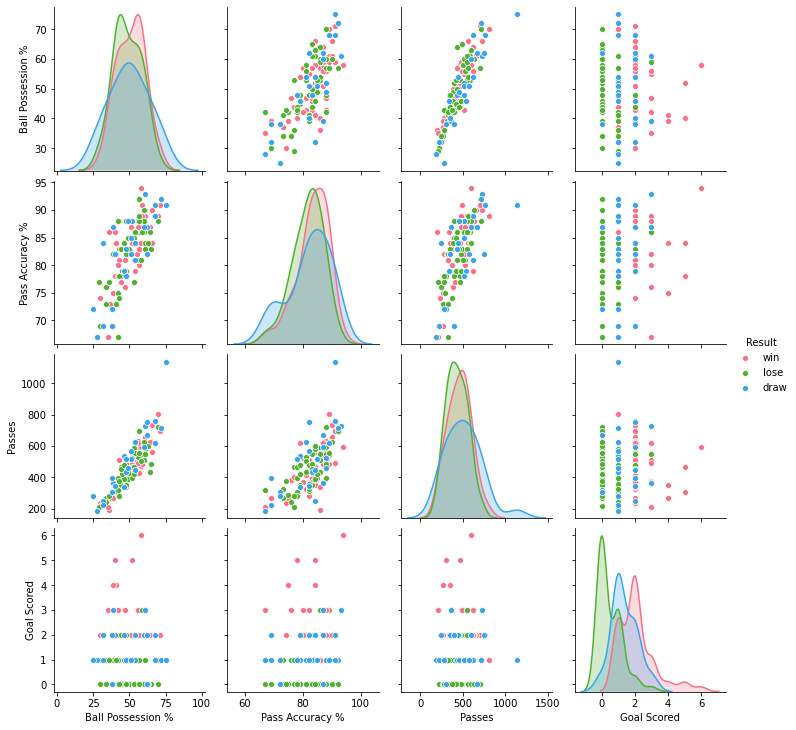

In [13]:
# Check correlations between related variables
fac_1 = ["Ball Possession %", "Pass Accuracy %", "Passes", "Goal Scored"]
sns.pairplot(df, vars=fac_1, hue="Result", palette="husl", corner=False, diag_kind="kde")
plt.show()

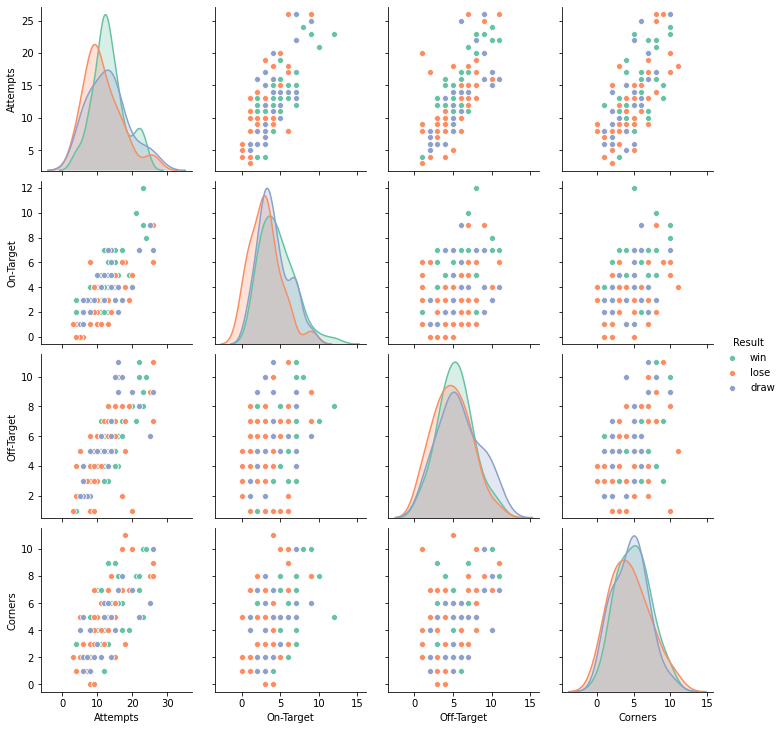

In [14]:
# Check correlations between related variables 

fac_2 = ["Attempts", "On-Target", "Off-Target", "Corners"]
sns.pairplot(df, vars=fac_2, hue="Result", palette="Set2", corner=False, diag_kind="auto")
plt.show()

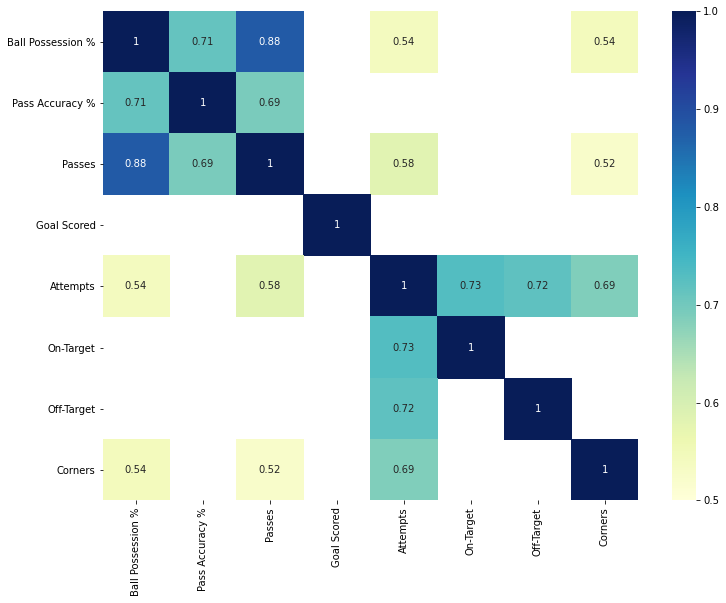

In [15]:
# Correlation coefficients of more than 0.5 between variables
fac_concat = df[fac_1 + fac_2]

plt.figure(figsize=(12, 9))
mask = fac_concat.corr() < 0.5
sns.heatmap(fac_concat.corr(), annot=True, vmin=0.5, vmax=1, mask=mask, cmap="YlGnBu")
plt.show()

#### Observations

1. I arbitrarily grouped variables considered hightly related in the context of soccer tactics. 
2. Looking at the scatterplots and the heatmap, there exist some strong and positive correlations between supgrouped variables. If the absolute value of correlation coefficient is more than 0.6, the correlation is usually considered strong, which is between the following variables:
    1. Ball Possession % - Passes (0.88), Attempts - On Target (0.73), Attempts - Off Target (0.72)
    2. Ball Possession % - Pass Accuracy % (0.71), Pass Accuracy % - Passes (0.69), Attempts - Corners (0.69)
3. Interestingly, when looking at the scatterplot between Ball Possession and Passess, it is hard to say that teams who won the match are more likely to have higer number of passes and higher percentage of ball possession.

In [16]:
# Compare variables related to the defence tactics

fig = px.bar(df, x="Result", y=["Offsides", "Blocked", "Saves", "Fouls Committed", "Yellow Card"],
            labels={"value": "Count", "variable": "Defence Indicators"}, barmode='group',
            title="Compare the match result groups with defence tactic indicators")
fig.show()

In [17]:
# Alert the continuous variable 1st Goal into categorical variable

df["first_goal"] = df["1st Goal"].rename().fillna(0).astype(int)

def goal_time(first_goal):
    first_goal = int(first_goal)
    
    bracket = ''
    if first_goal == 0:
        bracket = "no_goals"
    if first_goal in range (1, 11):
        bracket = "first_10min"
    if first_goal in range (11, 36):
        bracket = "in_game"
    if first_goal in range (36, 46):
        bracket = "last_10min"
    if first_goal in range (46, 56):
        bracket = "first_10min"
    if first_goal in range (56, 81):
        bracket = "in_game"
    if first_goal in range (81, 91):
        bracket = "last_10min"
    return bracket

df["first_goal"] = df["first_goal"].apply(goal_time)
df["first_goal"].head()

0       in_game
1      no_goals
2      no_goals
3    last_10min
4      no_goals
Name: first_goal, dtype: object

In [18]:
# Change the categorical value of column Result to numeric value
df["match_result"] = df["Result"].replace(to_replace=("win", "lose", "draw"), value=(3, 0, 1))
df["match_result"].head()

0    3
1    0
2    0
3    3
4    0
Name: match_result, dtype: int64

In [19]:
# Visualization of the association between 1st goal time, penalty shootout, and match result 
# using Parallel Categories Diagram

first_goal_dim = go.parcats.Dimension(values=df.first_goal, categoryorder='category ascending', label="1st Goal Time")
pso_dim = go.parcats.Dimension(values=df.PSO, label="Penalty Shootout")
result_dim = go.parcats.Dimension(values=df.match_result, label="Match Result", 
                                  categoryarray=[3, 0, 1], ticktext=["Win", "Lose", "Draw"])

color = df.match_result
colorscale = [[0, 'gray'], [0.5, 'firebrick']]

fig = go.Figure(data = [go.Parcats(dimensions=[first_goal_dim, pso_dim, result_dim], 
                                   line={"color": color, "colorscale": colorscale},
                                   hoveron='color', hoverinfo='count+probability',
                                   labelfont={'size': 18, 'family': 'Times'},
                                   tickfont={'size': 16, 'family': 'Times'},
                                   arrangement='freeform')])
fig.show()

In [20]:
# Check the correlation between number of goal scored and distance covered 
# categorized by match result and man of the match
# using density heatmaps

fig = px.density_heatmap(df, x="Distance Covered (Kms)", y="Goal Scored", color_continuous_scale="Viridis", 
                         facet_row="Man of the Match", facet_col="Result")
fig.show()

#### Observations

1. From the barplots, contradictory to a common belief that a team with strong defence wins a game, however, in terms of defence factors, it turns out there is no significant difference between teams that won the match and teams that lost the match.
2. Parallel categories diagram indicates that teams that won the match have much higher counts in all 1st goal time sections except the time section of no goals scored (of course!) When putting a pointer on each band, it shows the count and probability of each case. 
    1. For example, 19 teams that won the match had their first goal in the first 10 minutes in either the first half or the second half, and the probability of this case is 0.148(= 19/128), 14.8% of the total matches.
    2. It is more than three times higher than that of teams that lost the match, 0.047(=6/128), 4.7%.
3. Let's look at the density heatmaps. Interestingly, most teams that won the match are aggregated in the range of 90-119 kms, which is the same for the most teams that lost the match, meaning distances covered by a team might not be a major factor that determines the victory of the match.

### <a href='#Top of Contents'>[Move to the top of contents]</a>